## README
* This notebook is recommended to be run on Google Colab due to the use of YDF.
* Please ensure that you saved a copy of "1 - Project Data.xlsx" into Colab session before running this notebook on Colab.

## Environment Setup
* Installations
* Load data processing packages
* Set pandas display option

In [ ]:
# upgrade openpyxl to version 3.1.0 due to error in opening the excel file
!pip install --upgrade openpyxl==3.1.0

In [ ]:
!pip install ydf -U

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from time import time

In [ ]:
import ydf

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pd.set_option("display.max_columns", None)

## Initial Analysis

In [ ]:
df = pd.read_excel("1 - Project Data.xlsx")

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
text_cols = df.select_dtypes(include="object").columns
print("Number of unique values in text features:\n")
for c in text_cols:
    print(f"{c}\t: {df[c].nunique()}")
    if df[c].nunique() < 5:
        print(df[c].value_counts())
    print()

Number of unique values in text features:

CustomerID	: 7043

Country	: 1
Country
United States    7043
Name: count, dtype: int64

State	: 1
State
California    7043
Name: count, dtype: int64

City	: 1129

Lat Long	: 1652

Gender	: 2
Gender
Male      3555
Female    3488
Name: count, dtype: int64

Senior Citizen	: 2
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Partner	: 2
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents	: 2
Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Phone Service	: 2
Phone Service
Yes    6361
No      682
Name: count, dtype: int64

Multiple Lines	: 3
Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Internet Service	: 3
Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Online Security	: 3
Online Security
No                     3498
Yes                    2019
No internet service    1526
Name:

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [ ]:
num_cols = df.select_dtypes(exclude="object").columns
print("Number of unique values in numeric features:\n")
for n in num_cols:
    print(f"{n}\t: {df[n].nunique()}")

Number of unique values in numeric features:

Count	: 1
Zip Code	: 1652
Latitude	: 1652
Longitude	: 1651
Tenure Months	: 73
Monthly Charges	: 1585
Churn Value	: 2


In [ ]:
# check if any churn label is yes but churn value does not equal to 1
print(df[(df['Churn Label'] == 'Yes') & (df['Churn Value'] != 1)].count())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Reason         0
dtype: int64


In [ ]:
# check if any churn label is no but churn value does not equal to 0
print(df[(df['Churn Label'] == 'No') & (df['Churn Value'] != 0)].count())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Reason         0
dtype: int64


### Findings
* Features with only 1 unique value across all features: `Country`, `State`, `Count`.
* Features with all records unique: `CustomerID`.
* Categorical features: `Gender`,
`Senior Citizen`,
`Partner`,
`Dependents`,
`Phone Service`,
`Multiple Lines`,
`Internet Service`,
`Online Security`,
`Online Backup`,
`Device Protection`,
`Tech Support`,
`Streaming TV`,
`Streaming Movies`,
`Contract`,
`Paperless Billing`,
`Payment Method`.
* Duplicate values: `Lat Long` also found in `Latitude`, `Longitude`. Also, `Zip Code` shares same number of unique values with `Lat Long` `Latitude`.
* Missing values: `Churn Reason`. Could that be limited to only customers who churned?
* Duplicate targets: `Churn Value` = 0 when `Churn Label` = "No", `Churn Value` = 1 when `Churn Label` = "Yes".

### Next Action:
* Drop `Country`, `State`, `Count`, `Churn Label`.
* Drop `Lat Long`, `Latitude`, `Longitude` and preserve area information using `Zip Code` only.
* Convert `CustomerID` from feature to index to preserve the record uniqueness but exclude them from modelling.
* Convert all categorical features to numeric values.

## Train Test Split
80/20 split

In [ ]:
df = df.set_index('CustomerID')
df.head(2)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved


In [ ]:
target = 'Churn Value'
y = df[target].copy()
X = df.copy()
X = X.drop([target], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1204)

In [ ]:
assert(all(X_train.index==y_train.index)), "Index mismatch in training set"
assert(all(X_test.index==y_test.index)), "Index mismatch in test set"

## Data Transformation
* Map textual values to numerical representations.

In [ ]:
## Apply the same mapping to columns that have the same 2 value structure:
def map_binary(col):
    return col.map({'Yes':1, 'No':0, 1:1, 0:0})

##Apply the same mapping to columns that have the same 3 value structure:
def map_internet(col):
    return col.map({'Yes': 1, 'No': 0, 'No internet service': 0, 1:1, 0:0})

In [ ]:
def mapper(data, drop_total_charges=False):
    data = data.copy()

    binary_mapping = data[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']]
    for each in binary_mapping:
        data[each] = map_binary(data[each])

    internet_mapping = data[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']]
    for each in internet_mapping:
        data[each] = map_internet(data[each])

    ##Individual mappings
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 1:1, 0:0})
    data['Multiple Lines'] = data['Multiple Lines'].map({'Yes': 1, 'No': 0, 'No phone service': 0, 1:1, 0:0})

    ##~ means NOT --> Keeps all the rows where the Total Charges column doesn't have a fake null value
    if not drop_total_charges:
        data = data[data['Total Charges'].str.isspace() != True]
        data['Total Charges'] = data['Total Charges'].astype(float)

    return data

In [ ]:
# combine training set and transform for EDA
df_train = pd.concat([X_train, y_train], axis=1)
df_transformed = mapper(df_train)
df_transformed.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason,Churn Value
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,1,United States,California,Orick,95555,"41.336354, -124.044354",41.336354,-124.044354,1,0,1,0,72,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),19.40,1496.45,No,NaN,0
8224-UAXBZ,1,United States,California,Sacramento,95827,"38.549185, -121.328386",38.549185,-121.328386,1,0,1,0,58,0,0,DSL,1,1,0,0,1,0,One year,1,Electronic check,45.35,2540.10,No,NaN,0
5816-QVHRX,1,United States,California,San Leandro,94579,"37.687264, -122.15728",37.687264,-122.157280,1,0,0,0,37,1,1,Fiber optic,0,0,0,1,1,1,Month-to-month,0,Credit card (automatic),100.30,3541.40,No,NaN,0
6569-KTMDU,1,United States,California,Sacramento,95826,"38.542532, -121.378826",38.542532,-121.378826,1,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.10,19.10,No,NaN,0
0310-VQXAM,1,United States,California,San Bernardino,92404,"34.183286, -117.221722",34.183286,-117.221722,0,0,0,0,9,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.85,178.80,No,NaN,0


In [ ]:
# check data type and missing values
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 3910-MRQOY to 4971-PUYQO
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              5627 non-null   int64  
 1   Country            5627 non-null   object 
 2   State              5627 non-null   object 
 3   City               5627 non-null   object 
 4   Zip Code           5627 non-null   int64  
 5   Lat Long           5627 non-null   object 
 6   Latitude           5627 non-null   float64
 7   Longitude          5627 non-null   float64
 8   Gender             5627 non-null   int64  
 9   Senior Citizen     5627 non-null   int64  
 10  Partner            5627 non-null   int64  
 11  Dependents         5627 non-null   int64  
 12  Tenure Months      5627 non-null   int64  
 13  Phone Service      5627 non-null   int64  
 14  Multiple Lines     5627 non-null   int64  
 15  Internet Service   5627 non-null   object 
 16  Online Securit

## EDA

### EDA on Churners
* Consolidated from Frankie's codes

In [ ]:
df_leave = mapper(df)

In [ ]:

df_leave = df_leave[df_leave['Churn Value'] != 0] # create data frame of just those who Churn
df_leave.shape # what does it look like

(1869, 30)

In [ ]:
df['Contract'].value_counts() # what kind of contracts are people on overall

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
df_leave['Contract'].value_counts() # in comparison how many people in churn have these contracts

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


In [ ]:
df_leave['Churn Reason'].value_counts() # Why did people say they left

,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


What things did people have in terms of why they left?

In [ ]:
# Filter rows where 'Churn Reason' is 'Attitude of support person'
filtered_df = df_leave[df_leave['Churn Reason'] == 'Attitude of support person']

# Columns representing the packages (replace with actual column names for your dataset)
package_columns = ['Phone Service', 'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing']  # Replace these with your package column names

# Sum the values of these columns for the filtered DataFrame
package_sums = filtered_df[package_columns].sum()

# Display the result
package_sums

,0
Phone Service,179
Multiple Lines,74
Online Security,28
Online Backup,49
Device Protection,49
Tech Support,28
Streaming TV,76
Streaming Movies,81
Paperless Billing,142


In [ ]:
# where they likely to have a Month to month contract
df_leave[(df_leave['Churn Reason'] == 'Attitude of support person') &
                       (df_leave['Contract'] == 'Month-to-month')].value_counts().sum()

174

In [ ]:
# where they likely to have recived a dedicated technical support package
df_leave[(df_leave['Churn Reason'] == 'Attitude of support person') &
                       (df_leave['Tech Support'] == 0)].value_counts().sum()

164

In [ ]:
df_leave[(df_leave['Churn Reason'] == 'Competitor offered higher download speeds') & (df_leave['Internet Service'] != 'No')].value_counts().sum()

181

In [ ]:
# Filter rows where 'Contract' is 'One year' and select the columns 'Contract' and 'Tenure Months'
avg_months_1y = df_leave[df_leave['Contract'] == 'One year'][['Contract', 'Tenure Months']].sort_values(by='Tenure Months', ascending=False)

In [ ]:
avg_months_1y.describe()

,Tenure Months
count,166.000000
mean,44.963855
std,18.367261
min,2.000000
25%,33.000000
50%,48.000000
75%,59.000000
max,72.000000


In [ ]:
avg_months_2y = df_leave[df_leave['Contract'] == 'Two year'][['Contract', 'Tenure Months']] # two year version
avg_months_2y.describe()

,Tenure Months
count,48.000000
mean,61.270833
std,11.004331
min,25.000000
25%,55.750000
50%,65.500000
75%,70.000000
max,72.000000


In [ ]:
mtm_avg = df_leave[df_leave['Contract'] == 'Month-to-month'][['Contract', 'Tenure Months']] # month to month version
mtm_avg.describe()

,Tenure Months
count,1655.000000
mean,14.016918
std,15.828615
min,1.000000
25%,2.000000
50%,7.000000
75%,21.000000
max,71.000000


`City` was checked but this showed nothing great as the bigger the city the more people and therefore more churners.

In [ ]:
df_leave['City'].value_counts()

,count
City,
Los Angeles,90
San Diego,50
San Francisco,31
San Jose,29
Sacramento,26
...,...
Aromas,1
Stinson Beach,1
Mill Valley,1


In [ ]:
df['City'].value_counts()

,count
City,
Los Angeles,305
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
...,...
Healdsburg,4
Jenner,4
Philo,4


### Plots for Churners

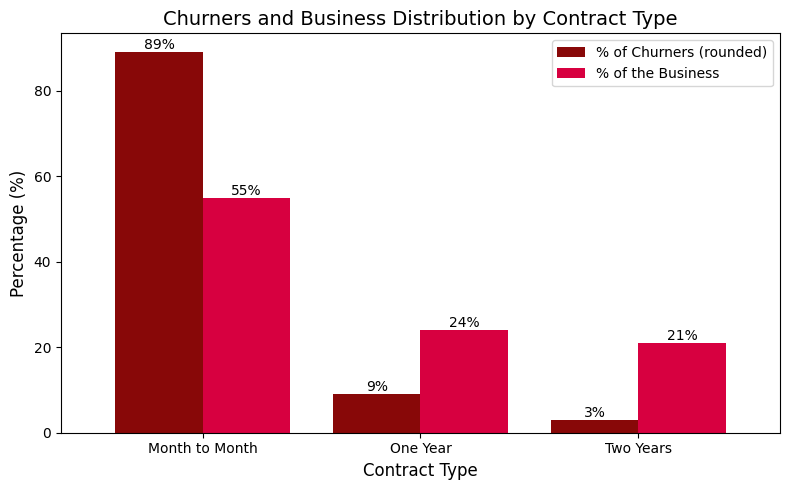

In [ ]:
# Create the data
data = {
    'Contract': ['Month to Month', 'One Year', 'Two Years'],
    '% of Churners (rounded)': [89, 9, 3],
    '% of the Business': [55, 24, 21]
}

# Create a DataFrame
df1 = pd.DataFrame(data)

# Plot the data
ax = df1.plot(
    x='Contract',
    kind='bar',
    y=['% of Churners (rounded)', '% of the Business'],
    color=['#880808', '#D70040'],
    figsize=(8, 5),
    width=0.8
)

# Add chart elements
plt.title('Churners and Business Distribution by Contract Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Contract Type', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(loc='upper right')

# Annotate the values on the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f%%', label_type='edge', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Findings on Churners

Most common reasons stated for leaving:
1. Attitude of support person
2. Competitor offered higher download speeds
3. Competitor offered more data

Accounting for 29% of all churners

Attitude of support person could be technical and contractual difficulties as:
* 90% had month to month contracts
* 74% had paperless billing
* 85% had not got the technical support package

Competitor offered higher download speeds:
* 96% of people had internet service

Competitor offered more data:
* 90% held a phone contract

Month to month Contracts have a serious impact on wether people are likely to churn. 89% of churners have month to month contract despite the fact that only 55% of all contracts are month to month. When looking at people with year/two year contracts most stayed on past the end of their contract. Hence those with year or more contracts are far less likely to churn.


Note: The reasons may not be the most accurate as reasons were stated but the required package to be dissatisfied with it was not always owned.

Possible areas of Improvement

Customer service experience/Tech Support: People who had received the technical support package were far less likely to state attitude of support person as the reason for leaving

### EDA on Non-Churners
* Plot histograms to compare feature distributions for customer who churned and those who didn't.
* Special handling for `Churn Reason` due to empty values

In [ ]:
drop_cols = ['CustomerID', 'City', 'Country', 'State', 'Count', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason']

In [ ]:
### return list of categorical features
def get_categories(data, drop_cols):
    categories = data.select_dtypes(include="object").columns
    features =  [c for c in categories if c not in drop_cols]
    print("Categorical features: ",features)
    return features

In [ ]:
## Churn reasons
reasons = df_transformed.loc[df_train[target]==1, 'Churn Reason']
reasons.value_counts()

,count
Churn Reason,
Attitude of support person,148
Competitor offered higher download speeds,147
Don't know,126
Competitor offered more data,123
Competitor made better offer,113
Attitude of service provider,110
Competitor had better devices,107
Product dissatisfaction,81
Network reliability,81


In [ ]:
## Churn reasons
reasons = df_transformed.loc[df_train[target]==0, 'Churn Reason']
reasons.value_counts()

,count
Churn Reason,


In [ ]:
features = get_categories(df_transformed, drop_cols)

churn = df_transformed[df_transformed[target] == 1]
no_churn = df_transformed[df_transformed[target] == 0]

Categorical features:  ['Internet Service', 'Contract', 'Payment Method']


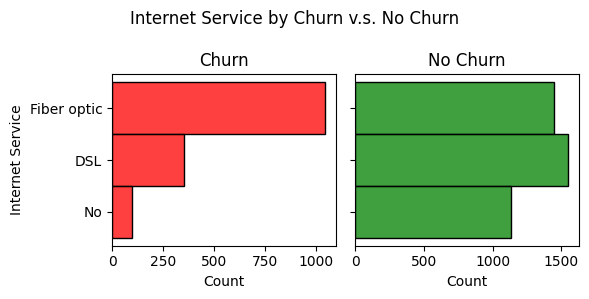

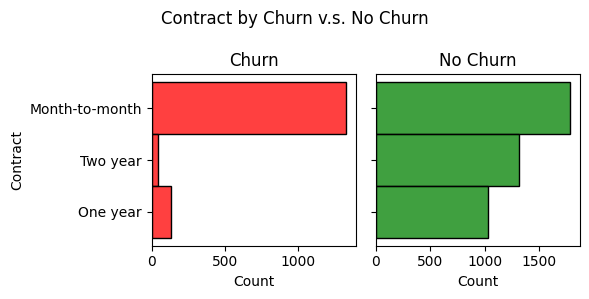

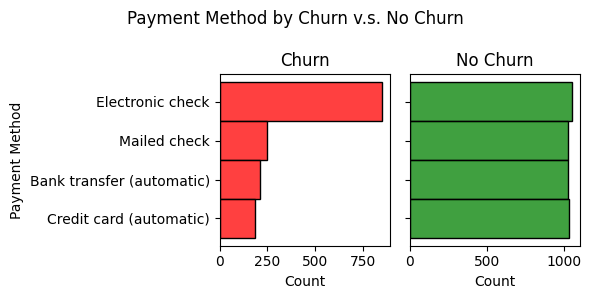

In [ ]:
for c in features:
    fig,ax = plt.subplots(1,2,figsize=(6,3), sharey=True)
    sns.histplot(data=churn, y=c, ax=ax[0], color="red")
    sns.histplot(data=no_churn, y=c, ax=ax[1], color="green")
    ax[0].set_title("Churn")
    ax[1].set_title("No Churn")
    fig.suptitle(f"{c.title()} by Churn v.s. No Churn")
    fig.tight_layout()
    plt.show()

In [ ]:
### return list of categorical features
def get_numeric_cols(data, drop_cols):
    categories = data.select_dtypes(exclude="object").columns
    features =  [c for c in categories if c not in drop_cols]
    print("Numeric features: ",features)
    return features

In [ ]:
num_drop_cols = ['CustomerID', 'City', 'Country', 'State', 'Count', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason',
                'Zip Code', 'Churn Value']

num_features = get_numeric_cols(df_transformed, num_drop_cols)

Numeric features:  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges']


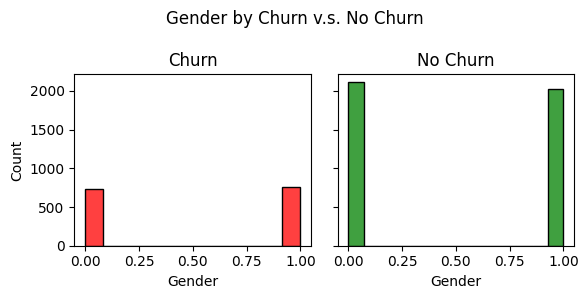

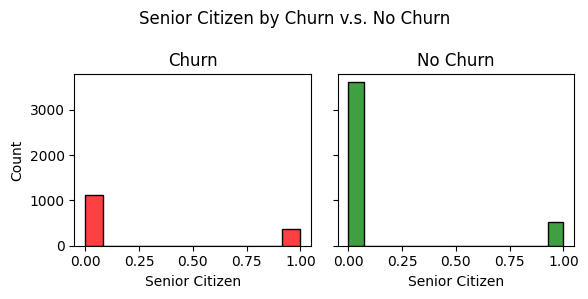

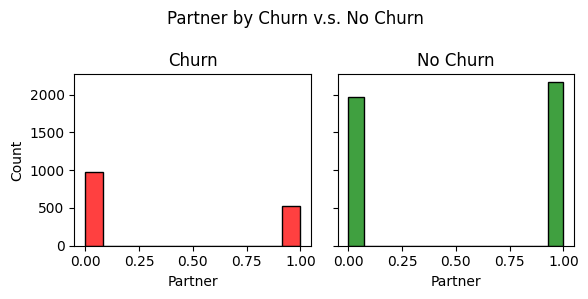

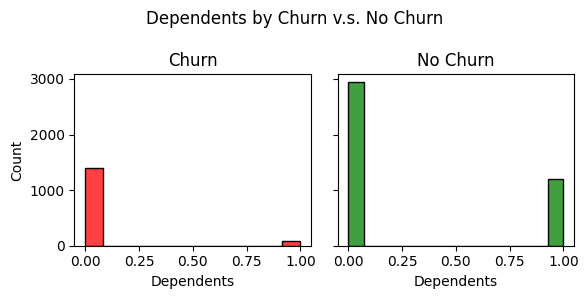

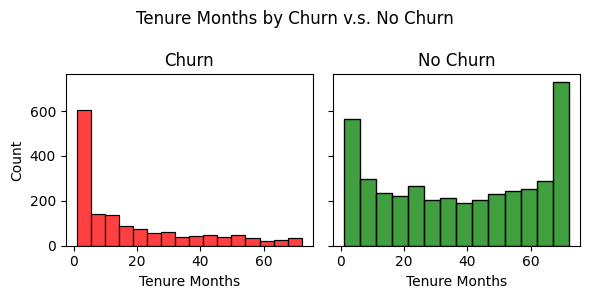

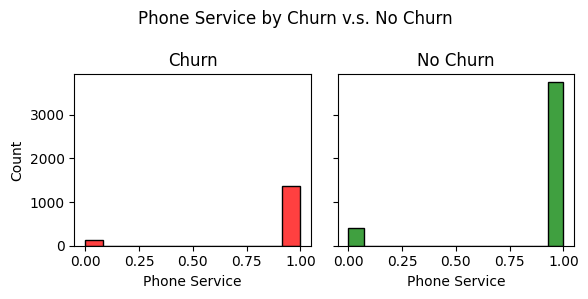

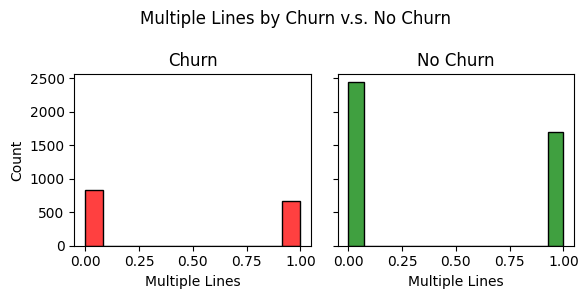

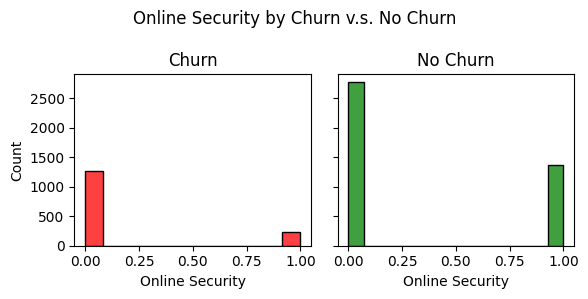

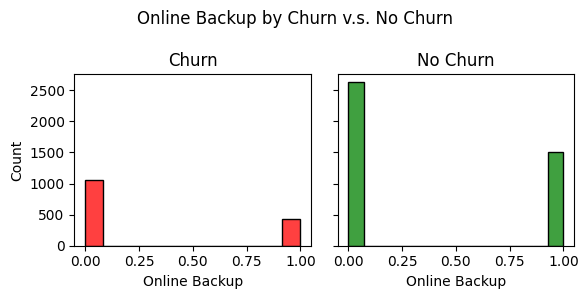

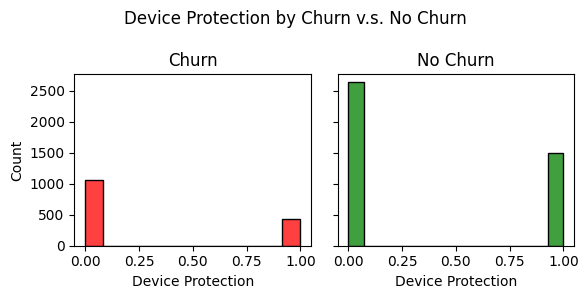

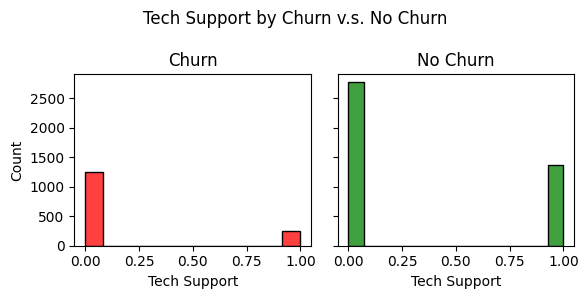

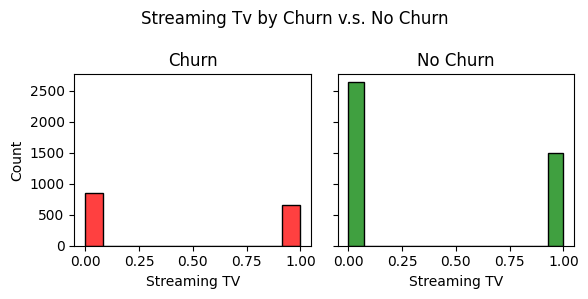

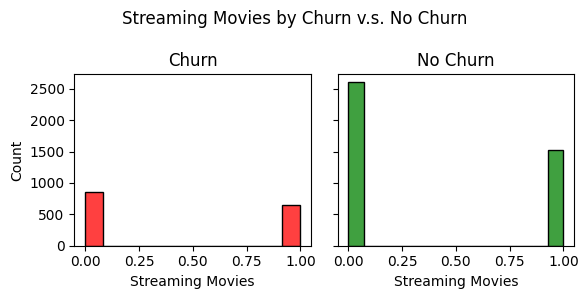

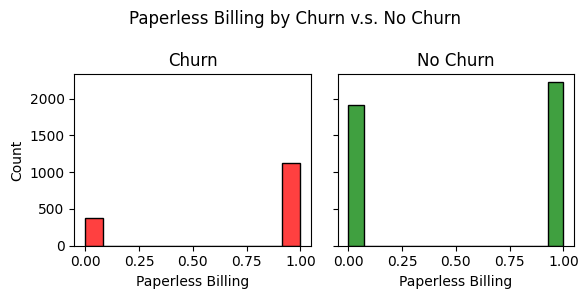

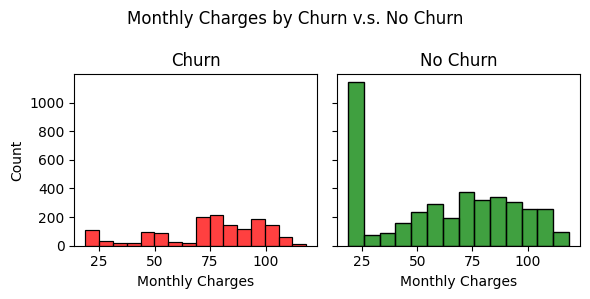

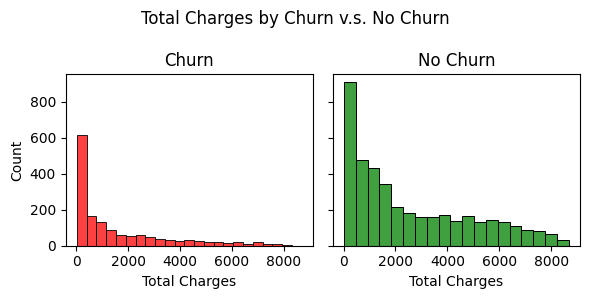

In [ ]:
for c in num_features:
    fig,ax = plt.subplots(1,2,figsize=(6,3), sharey=True)
    sns.histplot(data=churn, x=c, ax=ax[0], color="red")
    sns.histplot(data=no_churn, x=c, ax=ax[1], color="green")
    ax[0].set_title("Churn")
    ax[1].set_title("No Churn")
    fig.suptitle(f"{c.title()} by Churn v.s. No Churn")
    fig.tight_layout()
    plt.show()

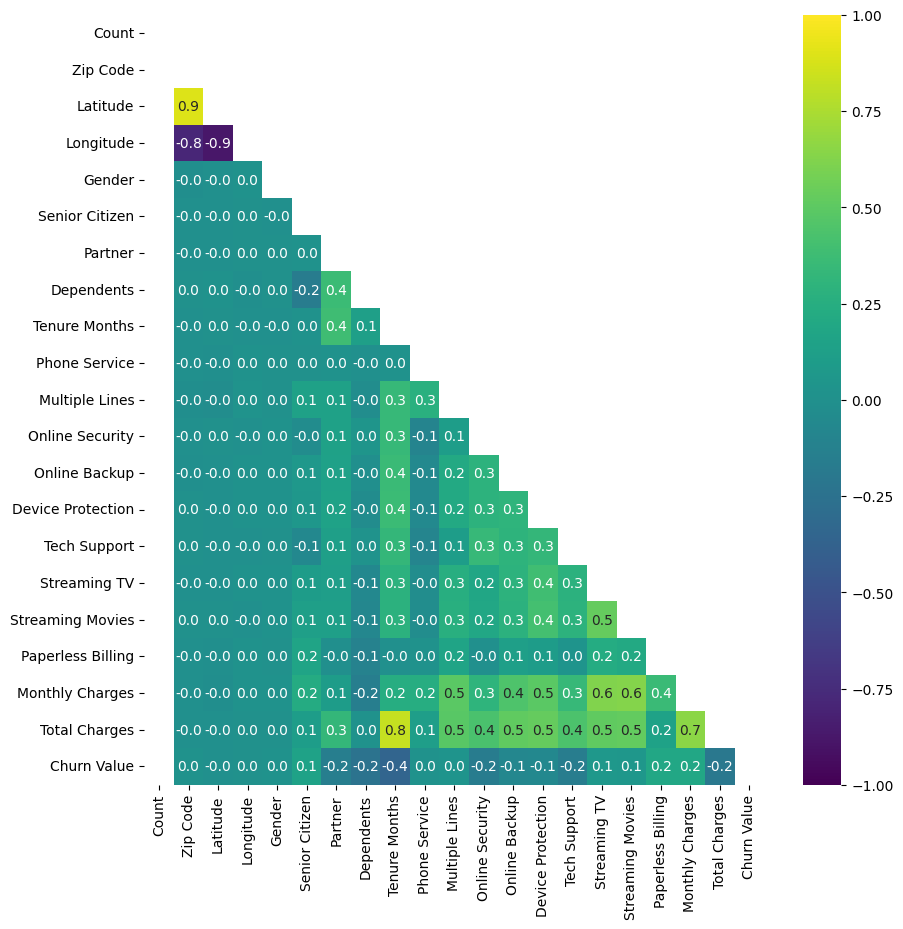

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_transformed.corr(numeric_only=True),
           vmin=-1, vmax=1, annot=True, cmap='viridis', fmt='.1f',
           mask=np.triu(df_transformed.corr(numeric_only=True))
           )
plt.show()

### Findings on Customers who did not churn (yet)
* `Churn Reason` is empty when Customer did not churn.
* Features that correlate with customers that do not churn:
    * `Senior Citizen`: Most customers who did not churn are not senior citizens, however in general SWAN telco do not have a large senior citizen customer demographic.
    * `Dependents`: Customers who do not have dependents are more unlikely to churn .
    * `Tenure Months`: Customers with more than 65 months' tenure are more unlikely to churn.
    * `Phone Service`: Customers with phone service are more unlikely to churn.
    * `Online Security`, `Online Backup`, `Device Protection`, `Tech Support`: Customer who did not opt-in for these add-ons are more unlikely to churn. **Caveat**: these share similar pattern for customers who churned as well.
    * `Streaming TV`, `Streaming Movies`: Customers who do not stream TV or movies are less likely to churn.
    * `Monthly Charges`: High number of customers with monthly charges below 25 are less likely to churn.
    * `Total Charges`: High number of customers with total charges below 500 are less likely to churn. **Caveat**: similar pattern for customers who churned as well.
* `Internet Service`, `Contract`, `Payment Method`: No significant patterns for customers who did not churn.
* Looking at the heatmap, we have `Total Charges` correlated very strongly with `Monthly Charges` and `Tenure Months`. This brings the question of multi-collinearity since it's likely that `Total Charges` = `Monthly Charges` * `Tenure Months`

In [ ]:
## Checking on collinearity of Total Charges, Monthly Charges and Tenure Months
charges = df_transformed[['Total Charges', 'Monthly Charges', 'Tenure Months']]
charges['product_charges'] = charges['Monthly Charges'] * charges['Tenure Months']
charges

<ipython-input-50-16c5e412b741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charges['product_charges'] = charges['Monthly Charges'] * charges['Tenure Months']


,Total Charges,Monthly Charges,Tenure Months,product_charges
CustomerID,,,,
3910-MRQOY,1496.45,19.40,72,1396.80
8224-UAXBZ,2540.10,45.35,58,2630.30
5816-QVHRX,3541.40,100.30,37,3711.10
6569-KTMDU,19.10,19.10,1,19.10
0310-VQXAM,178.80,19.85,9,178.65
...,...,...,...,...
6615-NGGZJ,1415.55,100.55,14,1407.70
2097-YVPKN,1654.75,25.75,65,1673.75
9971-ZWPBF,3625.20,108.90,34,3702.60


**Remark**: The product of `Monthly Charges` and `Tenure Months` could be more or less than the `Total Charges`, I'm uncertain what could be causing the discrepancies but regardless, we might be able to drop `Total Charges` if there's collinearity concerns in modelling.

## Feature Engineering

In [ ]:
def feature_eng(data):
    '''
    Accepts dataset, performs mapping and one-hot encoding
    Returns transformed dataset
    '''
    # 'Total Charges' feature is not dropped during EDA for analysis purposes. Only rows with missing 'Total Charges' were removed during EDA.
    # However after EDA, it's found that this feature is correlated strongly with 'Monthly Charges' and 'Tenure Months',
    # and we could approximate from that. Hence decided to just skip the mapper transformation to drop rows with missing 'Total Charges'
    # and instead drop 'Total Charges' feature at a later step
    # data = mapper(data, drop_total_charges=True)
    data = mapper(data)

    ## One-hot encoding on 'Internet Service', 'Contract', 'Payment Method'
    data = pd.get_dummies(data, columns=['Internet Service'], prefix="internet", dtype=int)
    data = pd.get_dummies(data, columns=['Contract'], prefix="contract", dtype=int)
    data = pd.get_dummies(data, columns=['Payment Method'], prefix="payment", dtype=int)

    return data

In [ ]:
# X_transformed = feature_eng(X_train)
df_transformed = feature_eng(df_train)
y_train = df_transformed[target]
X_transformed = df_transformed.drop(target, axis=1)
X_transformed.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Reason,internet_DSL,internet_Fiber optic,internet_No,contract_Month-to-month,contract_One year,contract_Two year,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,1,United States,California,Orick,95555,"41.336354, -124.044354",41.336354,-124.044354,1,0,1,0,72,1,0,0,0,0,0,0,0,0,19.40,1496.45,No,NaN,0,0,1,0,0,1,1,0,0,0
8224-UAXBZ,1,United States,California,Sacramento,95827,"38.549185, -121.328386",38.549185,-121.328386,1,0,1,0,58,0,0,1,1,0,0,1,0,1,45.35,2540.10,No,NaN,1,0,0,0,1,0,0,0,1,0
5816-QVHRX,1,United States,California,San Leandro,94579,"37.687264, -122.15728",37.687264,-122.157280,1,0,0,0,37,1,1,0,0,0,1,1,1,0,100.30,3541.40,No,NaN,0,1,0,1,0,0,0,1,0,0
6569-KTMDU,1,United States,California,Sacramento,95826,"38.542532, -121.378826",38.542532,-121.378826,1,0,0,0,1,1,0,0,0,0,0,0,0,0,19.10,19.10,No,NaN,0,0,1,1,0,0,0,0,0,1
0310-VQXAM,1,United States,California,San Bernardino,92404,"34.183286, -117.221722",34.183286,-117.221722,0,0,0,0,9,1,0,0,0,0,0,0,0,0,19.85,178.80,No,NaN,0,0,1,1,0,0,0,0,0,1


In [ ]:
## drop columns
drop_cols = ['Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason', 'Total Charges']
X_transformed.drop(drop_cols, axis=1, inplace=True)
X_transformed.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,internet_DSL,internet_Fiber optic,internet_No,contract_Month-to-month,contract_One year,contract_Two year,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,95555,1,0,1,0,72,1,0,0,0,0,0,0,0,0,19.40,0,0,1,0,0,1,1,0,0,0
8224-UAXBZ,95827,1,0,1,0,58,0,0,1,1,0,0,1,0,1,45.35,1,0,0,0,1,0,0,0,1,0
5816-QVHRX,94579,1,0,0,0,37,1,1,0,0,0,1,1,1,0,100.30,0,1,0,1,0,0,0,1,0,0
6569-KTMDU,95826,1,0,0,0,1,1,0,0,0,0,0,0,0,0,19.10,0,0,1,1,0,0,0,0,0,1
0310-VQXAM,92404,0,0,0,0,9,1,0,0,0,0,0,0,0,0,19.85,0,0,1,1,0,0,0,0,0,1


In [ ]:
assert(all(X_transformed.index==y_train.index)), "Index mismatch in transformed training set"

## Modelling
* Metric: 'Recall'
* Decision Tree and Random Forest using Grid Search CV

In [ ]:
# Display GridSearchCV results
def get_grid_results(grid):
    print("Best Estimator:")
    print(grid.best_estimator_)

    print("Best Hyperparameters:")
    print(grid.best_params_)

    print("Best Training Scores:")
    print(grid.best_score_)

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
# dt_grid = {'max_depth': [2, 3, 4, 6, 8, 10],
#            'min_samples_split': [5, 10, 15, 20, 50],
#            'min_samples_leaf': [2, 5, 10, 20, 50],
#            'criterion': ['gini', 'entropy'],
#            'random_state': [1204]
#           }

### Changed param_grid to the best estimator to save time on rerun
dt_grid = {'criterion': ['gini'],
           'max_depth': [2],
           'min_samples_leaf': [2],
           'min_samples_split': [5],
           'random_state': [1204]}

In [ ]:
gcv = GridSearchCV(dt,
                   param_grid=dt_grid,
                   cv=10,
                   refit=True,
                   scoring='recall',
                   verbose=1,
                   n_jobs=-1)

In [ ]:
start = time()
gcv.fit(X_transformed, y_train)
print(f"Time elapsed: {time() - start :.5f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Time elapsed: 2.57619


In [ ]:
get_grid_results(gcv)

Best Estimator:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5,
                       random_state=1204)
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 1204}
Best Training Scores:
0.6273914988814318


**Results**
* Best Estimator:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, random_state=1204)
* Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 1204}
* Best Training Scores: 0.6274720357941834

### Evaluate best DecisionTreeClassifier on training and test set

In [ ]:
def eval_metrics(y_actual, y_pred):
    accuracy = metrics.accuracy_score(y_actual, y_pred)
    precision = metrics.precision_score(y_actual, y_pred, zero_division=0.0)
    recall = metrics.recall_score(y_actual, y_pred, zero_division=0.0)
    f1 = metrics.f1_score(y_actual, y_pred)

    # print(f"Accuracy:{accuracy}")
    # print(f"Precision:{precision}")
    # print(f"Recall:{recall}")
    # print(f"F1:{f1}")
    return accuracy, precision, recall, f1

`eval_set()` performs evaluation on a list of thresholds from 0.1 to 1.0, this is to identify which probability threshold works best to predict customer churn by looking at the evaluation results per threshold.

In [ ]:
def eval_set(y_actual, pred):
    dt_scores = []
    ### create thresholds
    thresholds = np.arange(0.1, 1.1, 0.1)

    for t in thresholds:
        y_pred = np.where(pred[:,1] >= t, 1, 0)
        dt_scores.append(eval_metrics(y_actual, y_pred))

    df_scores = pd.DataFrame(dt_scores, columns=['accuracy', 'precision', 'recall', 'f1'])
    df_scores.insert(0, column='threshold', value=thresholds)
    df_scores.set_index('threshold')
    return df_scores

In [ ]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [ ]:
train_pred = gcv.predict_proba(X_transformed)

In [ ]:
### Evaluation on training set
df_scores = eval_set(y_train, train_pred)
df_scores

,threshold,accuracy,precision,recall,f1
0,0.1,0.576328,0.381054,0.952508,0.544343
1,0.2,0.652568,0.426093,0.886957,0.575646
2,0.3,0.762040,0.545349,0.627425,0.583515
3,0.4,0.762040,0.545349,0.627425,0.583515
4,0.5,0.762040,0.545349,0.627425,0.583515
5,0.6,0.734317,0.000000,0.000000,0.000000
6,0.7,0.734317,0.000000,0.000000,0.000000
7,0.8,0.734317,0.000000,0.000000,0.000000
8,0.9,0.734317,0.000000,0.000000,0.000000
9,1.0,0.734317,0.000000,0.000000,0.000000


In [ ]:
### Try best model on test set
# test_transformed = feature_eng(X_test)
# test_transformed.drop(drop_cols, axis=1, inplace=True)
# assert(all(test_transformed.index==y_test.index)), "Index mismatch in transformed test set"

### Try best model on test set
df_test = pd.concat([X_test, y_test], axis=1)
test_transformed = feature_eng(df_test)
y_test = test_transformed[target].copy()
test_transformed.drop(target, axis=1, inplace=True)
test_transformed.drop(drop_cols, axis=1, inplace=True)
assert(all(test_transformed.index==y_test.index)), "Index mismatch in transformed test set"

In [ ]:
test_pred = gcv.predict_proba(test_transformed)

### Evaluation on test set
df_scores = eval_set(y_test, test_pred)
df_scores

,threshold,accuracy,precision,recall,f1
0,0.1,0.580071,0.382096,0.935829,0.542636
1,0.2,0.659075,0.431193,0.879679,0.578716
2,0.3,0.762278,0.549020,0.598930,0.572890
3,0.4,0.762278,0.549020,0.598930,0.572890
4,0.5,0.762278,0.549020,0.598930,0.572890
5,0.6,0.733808,0.000000,0.000000,0.000000
6,0.7,0.733808,0.000000,0.000000,0.000000
7,0.8,0.733808,0.000000,0.000000,0.000000
8,0.9,0.733808,0.000000,0.000000,0.000000
9,1.0,0.733808,0.000000,0.000000,0.000000


### Evaluation Conclusion for DecisionTreeClassifier
Considering a balance of reasonable accuracy and recall, the optimal DecisionTreeClassifier model is found at:
* Decision Tree boundary: 0.2,

where,
* Accuracy (train/test): 0.76/0.76,
* Recall (train/test): 0.88/0.87

### Evaluate DecisionTreeClassifier on threshold 0.35
Here we reevaluate DecisionTreeClassifier on threshold `0.35` as this is the optimal decision boundary found for models `YDF` and `LogisticRegression`. This threshold is to be used as the common threshold across all models for deciding if a customer would churn or otherwise.

In [ ]:
df_full = pd.concat([X_transformed, test_transformed])
y_full = pd.concat([y_train, y_test])
df_full.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,internet_DSL,internet_Fiber optic,internet_No,contract_Month-to-month,contract_One year,contract_Two year,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,95555,1,0,1,0,72,1,0,0,0,0,0,0,0,0,19.40,0,0,1,0,0,1,1,0,0,0
8224-UAXBZ,95827,1,0,1,0,58,0,0,1,1,0,0,1,0,1,45.35,1,0,0,0,1,0,0,0,1,0
5816-QVHRX,94579,1,0,0,0,37,1,1,0,0,0,1,1,1,0,100.30,0,1,0,1,0,0,0,1,0,0
6569-KTMDU,95826,1,0,0,0,1,1,0,0,0,0,0,0,0,0,19.10,0,0,1,1,0,0,0,0,0,1
0310-VQXAM,92404,0,0,0,0,9,1,0,0,0,0,0,0,0,0,19.85,0,0,1,1,0,0,0,0,0,1


In [ ]:
assert(all(df_full.index==y_full.index)), "Index mismatch in train+test set"

In [ ]:
full_pred = gcv.predict_proba(df_full)[:,1]
full_pred = np.where(full_pred >= 0.35, 1, 0)
print("Evaluation on best Decision Tree Classifier at threshold 0.35")
get_results(y_full, full_pred)

Evaluation on best Decision Tree Classifier at threshold 0.35
The confusion matrix for your predictions is:
[[4197  966]
 [ 707 1162]] 

The accuracy of your model is: 0.7620875995449374
The recall of your model is: 0.6217228464419475
The precision of your model is: 0.5460526315789473
The F1-score of your model is: 0.5814360770577933


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
# rf_grid = {'n_estimators': [100, 250, 500],
#            'max_depth': [2, 3, 4, 6, 8],
#            'min_samples_split': [5, 10, 15, 20, 50],
#            'min_samples_leaf': [2, 5, 10, 20, 50],
#            'random_state': [1204]
#           }
### Changed param_grid to the best estimator to save time on rerun
rf_grid = {'max_depth': [8],
           'min_samples_leaf': [2],
           'min_samples_split': [5],
           'n_estimators': [500],
           'random_state': [1204]}

In [ ]:
gcv_rf = GridSearchCV(rf,
                   param_grid=rf_grid,
                   cv=10,
                   refit=True,
                   scoring='recall',
                   verbose=1,
                   n_jobs=-1)

In [ ]:
start = time()
gcv_rf.fit(X_transformed, y_train)
print(f"Time elapsed: {time() - start :.5f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Time elapsed: 31.78865


In [ ]:
get_grid_results(gcv_rf)

Best Estimator:
RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=1204)
Best Hyperparameters:
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 1204}
Best Training Scores:
0.5090201342281879


**Results**

* Best Estimator:
RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
n_estimators=500, random_state=1204)
* Best Hyperparameters:
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 1204}
* Best Training Scores: 0.5057181208053692

### Evaluate best RandomForestClassifier on training and test set

In [ ]:
train_pred = gcv_rf.predict_proba(X_transformed)

### Evaluation on training set
df_scores = eval_set(y_train, train_pred)
df_scores

,threshold,accuracy,precision,recall,f1
0,0.1,0.607962,0.403528,0.994649,0.574131
1,0.2,0.742492,0.508104,0.964548,0.665590
2,0.3,0.807180,0.594383,0.863545,0.704118
3,0.4,0.832771,0.667473,0.738462,0.701175
4,0.5,0.829394,0.735268,0.559197,0.635258
5,0.6,0.812511,0.829341,0.370569,0.512252
6,0.7,0.787098,0.918310,0.218060,0.352432
7,0.8,0.741070,0.975000,0.026087,0.050814
8,0.9,0.734317,0.000000,0.000000,0.000000
9,1.0,0.734317,0.000000,0.000000,0.000000


In [ ]:
test_pred = gcv_rf.predict_proba(test_transformed)

### Evaluation on test set
df_scores = eval_set(y_test, test_pred)
df_scores

,threshold,accuracy,precision,recall,f1
0,0.1,0.589324,0.391906,0.983957,0.560548
1,0.2,0.723843,0.489914,0.909091,0.636704
2,0.3,0.799288,0.588123,0.820856,0.685268
3,0.4,0.815658,0.644836,0.684492,0.664073
4,0.5,0.815658,0.707581,0.524064,0.602151
5,0.6,0.783630,0.721519,0.304813,0.428571
6,0.7,0.756584,0.758065,0.125668,0.215596
7,0.8,0.737367,0.857143,0.016043,0.031496
8,0.9,0.733808,0.000000,0.000000,0.000000
9,1.0,0.733808,0.000000,0.000000,0.000000


### Evaluation Conclusion for RandomForestClassifier
Considering a balance of reasonable accuracy and recall, optimal models:
* RandomForest boundary: 0.3,
* Accuracy (train/test): 0.80/0.79,
* Recall (train/test): 0.86/0.81.

### Evaluate RandomForestClassifier on threshold 0.35
Here we reevaluate RandomForestClassifier on threshold `0.35` as this is the optimal decision boundary found for models `YDF` and `LogisticRegression`. This threshold is to be used as the common threshold across all models for deciding if a customer would churn or otherwise.

In [ ]:
full_pred_rf = gcv_rf.predict_proba(df_full)[:,1]
full_pred_rf = np.where(full_pred_rf >= 0.35, 1, 0)
print("Evaluation on best Random Forest Classifier at threshold 0.35")
get_results(y_full, full_pred_rf)

Evaluation on best Random Forest Classifier at threshold 0.35
The confusion matrix for your predictions is:
[[4285  878]
 [ 393 1476]] 

The accuracy of your model is: 0.819254835039818
The recall of your model is: 0.7897271268057785
The precision of your model is: 0.627017841971113
The F1-score of your model is: 0.6990291262135923


### YDF
* **Note**: Adapted from Frankie's YDF modelling notebook

In [ ]:
feature_ydf = list(df.columns)
feature_ydf.remove('Churn Value')
feature_ydf.remove('Churn Label')
feature_ydf.remove('Churn Reason')
feature_ydf.remove('Lat Long')
feature_ydf.remove('Latitude')
feature_ydf.remove('Longitude')
feature_ydf.remove('Zip Code')
feature_ydf.remove('Streaming Movies')
feature_ydf.remove('Paperless Billing')
feature_ydf.remove('Tech Support')
feature_ydf.remove('Gender')
feature_ydf.remove('Phone Service')
feature_ydf.remove('Device Protection')
feature_ydf.remove('Online Security')
feature_ydf.remove('Online Backup')
##feature_ydf.remove('Multiple Lines')
#feature_ydf.remove('Streaming TV')

df_ydf = mapper(df)
y_ydf = df_ydf['Churn Value']
X_ydf = df_ydf[feature_ydf]

In [ ]:
X_ydf_train, X_ydf_test, y_ydf_train, y_ydf_test = train_test_split(X_ydf, y_ydf, test_size=.2, random_state=1204, stratify=y_ydf)
X_ydf_train['Churn Value'] = y_ydf_train ## This is adding the label/target/things we're trying to predict back to X test and X train
X_ydf_test['Churn Value'] = y_ydf_test

In [ ]:
ydf_model = ydf.GradientBoostedTreesLearner(label="Churn Value").train(X_ydf_train)

Train model on 5625 examples
Model trained in 0:00:01.192909


In [ ]:
ydf_model.evaluate(X_ydf_train)

Label \ Pred,0,1
0,3913,574
1,217,921


In [ ]:
ydf_model.evaluate(X_ydf_test)

Label \ Pred,0,1
0,937,215
1,96,159


In [ ]:
ydf_tuner = ydf.RandomSearchTuner(num_trials=50)
new_model1 = ydf.GradientBoostedTreesLearner(tuner=ydf_tuner, label='Churn Value').train(X_ydf_train)

Train model on 5625 examples
Model trained in 0:00:01.175560


In [ ]:
new_model1.evaluate(X_ydf_train)

Label \ Pred,0,1
0,3913,574
1,217,921


In [ ]:
new_model1.evaluate(X_ydf_test)

Label \ Pred,0,1
0,937,215
1,96,159


In [ ]:
ydf_predictions = new_model1.predict(df_ydf)
len(ydf_predictions)

7032

In [ ]:
ydf_pred = np.where(ydf_predictions >= .35,
                              1,
                              0)
get_results(y_ydf, ydf_pred)

The confusion matrix for your predictions is:
[[4338  825]
 [ 370 1499]] 

The accuracy of your model is: 0.8300625711035268
The recall of your model is: 0.8020331728196897
The precision of your model is: 0.6450086058519794
The F1-score of your model is: 0.7150011924636298


### Evaluation Conclusion for YDF
Considering a balance of reasonable accuracy and recall, optimal YDF model:
* Accuracy : 0.83,
* Recall : 0.80

### Logistic Regression
* Adapted from Toby's Logistic Regression notebook

In [ ]:
def feature_eng_lr(data):

  data = data.copy()

  data = mapper(data)

# Dropping unnecessary columns:

  data.drop(columns=['Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 'Gender'], inplace=True)
  data.drop(columns=['Churn Label', 'Churn Reason'], inplace=True)

# One Hot Encoding

  data = pd.get_dummies(data, columns = ['Internet Service'], prefix = 'IS', dtype = 'int')
  data = pd.get_dummies(data, columns = ['Contract'], prefix = 'Contract', dtype = 'int')
  data = pd.get_dummies(data, columns = ['Payment Method'], prefix = 'PM', dtype = 'int')

# Binning

  data['Tenure_Bin'] = pd.cut(data['Tenure Months'], bins=[0, 12, 24, 36, 48, 60, 999], labels=['1', '2', '3', '4', '5', '6'], right = False)
  data['Tenure_Bin'] = data['Tenure_Bin'].astype(int)

  return data

In [ ]:
X_train_fe = feature_eng_lr(X_train)

In [ ]:
X_train_fe.head()

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,IS_DSL,IS_Fiber optic,IS_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,Tenure_Bin
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,95555,0,1,0,72,1,0,0,0,0,0,0,0,0,19.40,1496.45,0,0,1,0,0,1,1,0,0,0,6
8224-UAXBZ,95827,0,1,0,58,0,0,1,1,0,0,1,0,1,45.35,2540.10,1,0,0,0,1,0,0,0,1,0,5
5816-QVHRX,94579,0,0,0,37,1,1,0,0,0,1,1,1,0,100.30,3541.40,0,1,0,1,0,0,0,1,0,0,4
6569-KTMDU,95826,0,0,0,1,1,0,0,0,0,0,0,0,0,19.10,19.10,0,0,1,1,0,0,0,0,0,1,1
0310-VQXAM,92404,0,0,0,9,1,0,0,0,0,0,0,0,0,19.85,178.80,0,0,1,1,0,0,0,0,0,1,1


In [ ]:
lr = LogisticRegression(max_iter=2500, random_state=1204)

In [ ]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=2500, random_state=1204)

In [ ]:
lr.predict_proba(X_train_fe)

array([[0.99704459, 0.00295541],
       [0.93096416, 0.06903584],
       [0.58951478, 0.41048522],
       ...,
       [0.77262524, 0.22737476],
       [0.99240854, 0.00759146],
       [0.36692531, 0.63307469]])

In [ ]:
X_train_fe[['prob_stay', 'prob_leave']] = lr.predict_proba(X_train_fe)

In [ ]:
X_train_fe.head()

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,IS_DSL,IS_Fiber optic,IS_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,Tenure_Bin,prob_stay,prob_leave
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3910-MRQOY,95555,0,1,0,72,1,0,0,0,0,0,0,0,0,19.40,1496.45,0,0,1,0,0,1,1,0,0,0,6,0.997045,0.002955
8224-UAXBZ,95827,0,1,0,58,0,0,1,1,0,0,1,0,1,45.35,2540.10,1,0,0,0,1,0,0,0,1,0,5,0.930964,0.069036
5816-QVHRX,94579,0,0,0,37,1,1,0,0,0,1,1,1,0,100.30,3541.40,0,1,0,1,0,0,0,1,0,0,4,0.589515,0.410485
6569-KTMDU,95826,0,0,0,1,1,0,0,0,0,0,0,0,0,19.10,19.10,0,0,1,1,0,0,0,0,0,1,1,0.746804,0.253196
0310-VQXAM,92404,0,0,0,9,1,0,0,0,0,0,0,0,0,19.85,178.80,0,0,1,1,0,0,0,0,0,1,1,0.858860,0.141140


In [ ]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_leave']>.35, 1, 0)

In [ ]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3340  792]
 [ 419 1076]] 

The accuracy of your model is: 0.7847876310645104
The recall of your model is: 0.7197324414715719
The precision of your model is: 0.576017130620985
The F1-score of your model is: 0.63990484686292


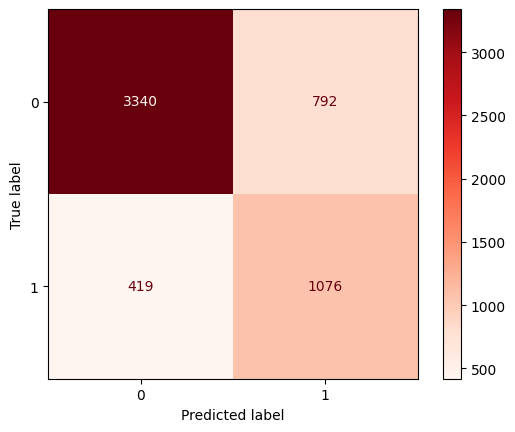

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, X_train_fe['y_pred'])).plot(cmap='Reds')
plt.show()

The confusion matrix for your predictions is:
[[846 185]
 [ 93 281]] 

The accuracy of your model is: 0.8021352313167259
The recall of your model is: 0.7513368983957219
The precision of your model is: 0.6030042918454935
The F1-score of your model is: 0.669047619047619


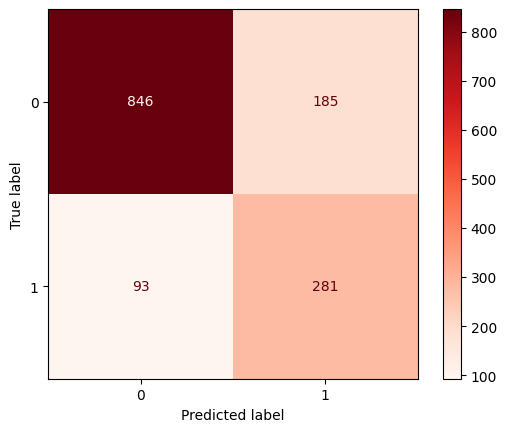

In [ ]:
### Evaluate trained model on test set
X_test_fe = feature_eng_lr(X_test)
lr.predict_proba(X_test_fe)
X_test_fe[['prob_stay', 'prob_leave']] = lr.predict_proba(X_test_fe)
X_test_fe['y_pred'] = np.where(X_test_fe['prob_leave']>.35, 1, 0)
get_results(y_test, X_test_fe['y_pred'])
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, X_test_fe['y_pred'])).plot(cmap = 'Reds')
plt.show()

In [ ]:
# Re-join the test and train groups and also, separately, the x and y groups

train_combined = X_train_fe.join(y_train)
test_combined = X_test_fe.join(y_test)
X_combined = pd.concat([X_train_fe, X_test_fe]).sort_index()
y_combined = pd.concat([y_train, y_test]).sort_index()

full_pred_lr = pd.concat([train_combined, test_combined]).sort_index()

full_pred_lr.head()

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,IS_DSL,IS_Fiber optic,IS_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,Tenure_Bin,prob_stay,prob_leave,y_pred,Churn Value
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,93225,0,1,0,9,1,0,0,1,0,1,1,0,1,65.6,593.30,1,0,0,0,1,0,0,0,0,1,1,0.794241,0.205759,0,0
0003-MKNFE,91206,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.40,1,0,0,1,0,0,0,0,0,1,1,0.664960,0.335040,0,0
0004-TLHLJ,92627,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,0,1,0,1,0,0,0,0,1,0,1,0.334906,0.665094,1,1
0011-IGKFF,94553,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,0,1,0,1,0,0,0,0,1,0,2,0.216588,0.783412,1,1
0013-EXCHZ,93010,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.40,0,1,0,1,0,0,0,0,0,1,1,0.307767,0.692233,1,1


The confusion matrix for your predictions is:
[[4186  977]
 [ 512 1357]] 

The accuracy of your model is: 0.7882536973833902
The recall of your model is: 0.7260567148207597
The precision of your model is: 0.5814053127677806
The F1-score of your model is: 0.6457292410183203


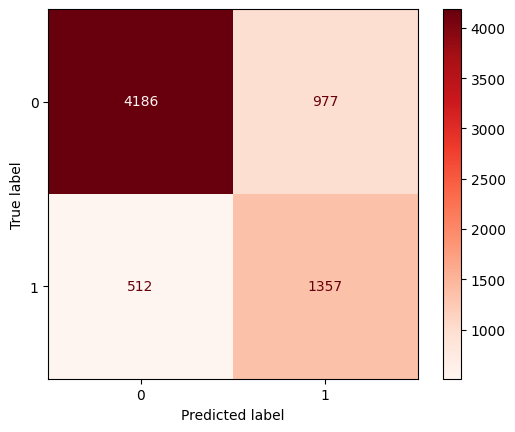

In [ ]:
get_results(y_combined, X_combined['y_pred'])
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_combined, X_combined['y_pred'])).plot(cmap = 'Reds')
plt.show()

### Evaluation Conclusion for Logistic Regression
Considering a balance of reasonable accuracy and recall, optimal Logistic Regression model:
* Accuracy : 0.788,
* Recall : 0.726

### Evaluation Conclusion on all models
(Adapted from Frankie's notebook.)

We prioritised the accuracy and recall scores across all 4 models when look at the model performances.

In summary, DecisionTreeClassifier underperformed in both metrics compared to the other models. Due to concern that it may affect the final predicted churn probabilities, we decided to exclude this model in the final set of predictions on non-churn customers.

**Final Models**
* Logistic Regression
* YDF
* Random Forest Classifier


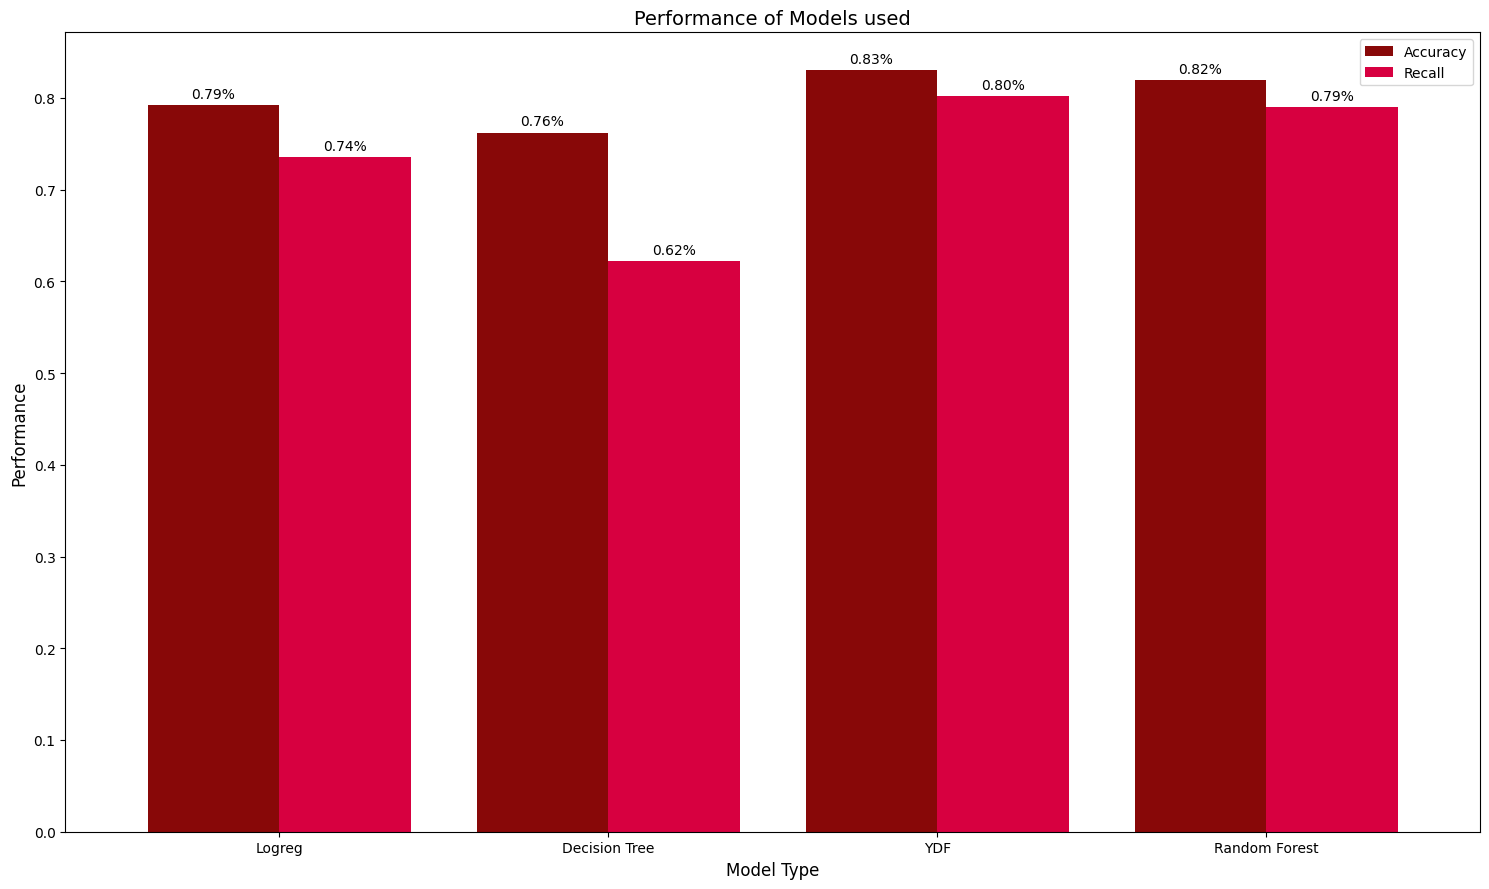

In [ ]:
### Create the data
data = {
    'Model type': ['Logreg', 'Decision Tree', 'YDF', 'Random Forest'],
    'Accuracy': [0.7918088737201365, 0.7620875995449374, 0.8299203640500569, 0.819254835039818],
    'Recall': [0.7351524879614767, 0.6217228464419475, 0.8020331728196897,0.7897271268057785]
}

### Create a DataFrame
df2 = pd.DataFrame(data)

### Plot the data
ax = df2.plot(
    x='Model type',
    kind='bar',
    y=['Accuracy', 'Recall'],
    color=['#880808', '#D70040'],
    figsize=(15, 9),
    width=0.8
)

### Add chart elements
plt.title('Performance of Models used', fontsize=14)
plt.ylabel('Performance', fontsize=12)
plt.xlabel('Model Type', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

### Annotate the values on the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

### Display the plot
plt.tight_layout()
plt.show()


## Feature Importance

In [ ]:
## Feature importance for Decision Tree Classifier
print("Decision Tree Classifier important features")
feature_cols = X_transformed.columns
sorted(zip(feature_cols, gcv.best_estimator_.feature_importances_), key=lambda x:x[1], reverse=True)

Decision Tree Classifier important features


[('contract_Month-to-month', 0.7448681402860092),
 ('internet_Fiber optic', 0.2273702131404878),
 ('Monthly Charges', 0.027761646573502972),
 ('Zip Code', 0.0),
 ('Gender', 0.0),
 ('Senior Citizen', 0.0),
 ('Partner', 0.0),
 ('Dependents', 0.0),
 ('Tenure Months', 0.0),
 ('Phone Service', 0.0),
 ('Multiple Lines', 0.0),
 ('Online Security', 0.0),
 ('Online Backup', 0.0),
 ('Device Protection', 0.0),
 ('Tech Support', 0.0),
 ('Streaming TV', 0.0),
 ('Streaming Movies', 0.0),
 ('Paperless Billing', 0.0),
 ('internet_DSL', 0.0),
 ('internet_No', 0.0),
 ('contract_One year', 0.0),
 ('contract_Two year', 0.0),
 ('payment_Bank transfer (automatic)', 0.0),
 ('payment_Credit card (automatic)', 0.0),
 ('payment_Electronic check', 0.0),
 ('payment_Mailed check', 0.0)]

In [ ]:
## Feature importance for Random Forest Classifier
print("Random Forest Classifier important features")
feature_cols = X_transformed.columns
sorted(zip(feature_cols, gcv_rf.best_estimator_.feature_importances_), key=lambda x:x[1], reverse=True)

Random Forest Classifier important features


[('Tenure Months', 0.207026872745826),
 ('contract_Month-to-month', 0.15702038231895155),
 ('Monthly Charges', 0.09826935197789419),
 ('internet_Fiber optic', 0.09046027312226197),
 ('Dependents', 0.06340788861718946),
 ('contract_Two year', 0.058757551756905876),
 ('payment_Electronic check', 0.056366412851054135),
 ('Zip Code', 0.05133662008869536),
 ('internet_No', 0.025351232529288777),
 ('contract_One year', 0.022795130218724178),
 ('Online Security', 0.02207636117261618),
 ('Paperless Billing', 0.02000903651000895),
 ('Tech Support', 0.018805413599405258),
 ('internet_DSL', 0.01717428607793675),
 ('Partner', 0.010370093337777964),
 ('Streaming TV', 0.010253774586763801),
 ('Online Backup', 0.009114059634240192),
 ('Senior Citizen', 0.00901414571242565),
 ('Streaming Movies', 0.008437136917564833),
 ('Gender', 0.008029943786148084),
 ('Multiple Lines', 0.007927738265653798),
 ('Device Protection', 0.007630899792599767),
 ('Phone Service', 0.005255264129866358),
 ('payment_Mailed c

In [ ]:
## Feature Importance
print("YDF important features")
new_model1.describe()

YDF important features


trial,score,duration
0,-0.92984,1.17335


### Conclusion on Feature Importance
These common features are found important across various models when predicting customer churn:
* Contract, especially if it's a Month-to-month contract.
* Internet service, particularly fiber optic service.
* Monthly charges.
* Tenure months
* Dependents
* Partner
* Senior Citizen

## Prediction on Non-Churn Customers

The best models from [Modelling](#Modelling) Section are used to generate the final probability for churn. We included:
* Random Forest Classifier
* YDF
* Logistic Regression

To compute the final churn probability score for each customer, we take a weighted average of each model's churn probability, where the weights come from the model's accuracy score:

$\mathbb{P}_\text{Customer Churn} = \displaystyle \frac{1}{A} \sum_{i=1}^{N} \text{accuracy_score}_i * \mathbb{P}_\text{churn i}$

where

* $A$: Sum of accuracy scores of all models.
* $N$: Number of models.
* $\text{accuracy_score}_i$: Accuracy score of model $i$.
* $\mathbb{P}_\text{churn i}$: Probability of churn predicted by model $i$.

In [ ]:
# make a copy of non-churn customers for prediction
df_no_churn = df[df['Churn Value'] == 0].copy()
df_no_churn.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [ ]:
### Data Transformation
no_churn_transformed = feature_eng(df_no_churn)
y_no_churn = no_churn_transformed[target]
no_churn_transformed.drop(target, axis=1, inplace=True)
no_churn_transformed.drop(drop_cols, axis=1, inplace=True)
no_churn_transformed.head()
assert(all(no_churn_transformed.index==y_no_churn.index)), "Index mismatch in no churn set"

In [ ]:
pred_list = []

# ### Predict using decision tree classifier (via GridSearchCV best estimator)
# dt_pred = gcv.predict_proba(no_churn_transformed)[:,1]
# pred_list.append('decision_tree_pred')

### Predict using random forest classifier (via GridSearchCV best estimator)
rf_pred = gcv_rf.predict_proba(no_churn_transformed)[:,1]
pred_list.append('random_forest_pred')

In [ ]:
### Predict using YDF best model
df_ydf_no_churn = df_ydf[df_ydf['Churn Value'] == 0].copy()
ydf_pred = new_model1.predict(df_ydf_no_churn)
pred_list.append('ydf_pred')

In [ ]:
### Predict using Logistic Regression best model
# lr_pred = full_pred_lr.loc[full_pred_lr['Churn Value'] == 0, 'prob_leave']
# pred_list.append('logreg_pred')

### Data Transformation
no_churn_lr = feature_eng_lr(df_no_churn)
y_no_churn_lr = no_churn_lr[target]
no_churn_lr.drop(columns=[target], inplace=True)
assert(all(no_churn_lr.index==y_no_churn_lr.index)), "Index mismatch in logreg no churn set"

In [ ]:
lr_pred = lr.predict_proba(no_churn_lr)[:,1]
pred_list.append('logreg_pred')

In [ ]:
def get_accuracy_weight(actual, proba, threshold):
  pred = np.where(proba >= threshold, 1, 0)
  return metrics.accuracy_score(actual, pred)

In [ ]:
def get_mean_pred(y, threshold, list_col, *pred_list):
    df_pred = pd.DataFrame(index=y_no_churn.index)
    weights = []
    # for each set of predictions, create new columns to store it
    # compute its accuracy as weights for the mean prediction
    for i,p in enumerate(pred_list):
        df_pred[list_col[i]] = p
        weights.append(get_accuracy_weight(y, p, threshold))

    # df_pred['mean_pred'] = df_pred.mean(axis=1, numeric_only=True)
    # compute weighted average for the prediction probability
    df_pred['Churn Probability'] = df_pred.dot(weights) / sum(weights)
    df_pred['Churn Value Prediction'] = np.where(df_pred['Churn Probability'] >= threshold, 1, 0)
    return df_pred

In [ ]:
threshold = 0.35
# df_pred = get_mean_pred(y_no_churn, threshold, pred_list, dt_pred, rf_pred, ydf_pred)
df_pred = get_mean_pred(y_no_churn, threshold, pred_list, rf_pred, ydf_pred, lr_pred)
df_pred.head()

,random_forest_pred,ydf_pred,logreg_pred,Churn Probability,Churn Value Prediction
CustomerID,,,,,
7590-VHVEG,0.528329,0.572527,0.734048,0.610527,1
5575-GNVDE,0.109211,0.078356,0.040030,0.076153,0
7795-CFOCW,0.082523,0.078356,0.030166,0.064001,0
1452-KIOVK,0.252050,0.297624,0.216888,0.255993,0
6713-OKOMC,0.248197,0.195248,0.270045,0.237405,0


## Output Generation



In [ ]:
## Output predictions to excel file
output = pd.concat([df_pred, no_churn_transformed[['Monthly Charges']] ], axis=1)
output = output[['Churn Probability', 'Monthly Charges']]
output.reset_index(inplace=True)
output

,CustomerID,Churn Probability,Monthly Charges
0,7590-VHVEG,0.610527,29.85
1,5575-GNVDE,0.076153,56.95
2,7795-CFOCW,0.064001,42.30
3,1452-KIOVK,0.255993,89.10
4,6713-OKOMC,0.237405,29.75
...,...,...,...
5158,2569-WGERO,0.018239,21.15
5159,6840-RESVB,0.051644,84.80
5160,2234-XADUH,0.056955,103.20
5161,4801-JZAZL,0.174324,29.60


In [ ]:
### Save churn probabilities to Excel
output.to_excel("santa_tech_full_predictions.xlsx")

In [ ]:
top500 = output.sort_values(by=['Churn Probability'], ascending=False)[:500]
top500.to_excel("santa_tech_top_500.xlsx")

### Future considerations:
* Look at monthly costs and use that to refine/target churners as the higher spenders would be more benificial to keep.